**Data Collection**

In [ ]:
# import library
import numpy as np
import pandas as pd
import requests
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

In [ ]:
## load excel / csv data files
# Example: GDP
df1_GDP = pd.read_csv('DF1_GDP.csv')
df1_GDP.columns.values[0] = 'Year'
df1_GDP.columns.values[1] = 'Quarter'
df1_GDP.columns.values[2] = 'GDP'
df1_GDP_ = df1_GDP[['Year','Quarter','GDP']].dropna()
df1_GDP_01 = df1_GDP_.loc[(df1_GDP_['Year']=='2013')|(df1_GDP_['Year']=='2014')|(df1_GDP_['Year']=='2015')|(df1_GDP_['Year']=='2016')|(df1_GDP_['Year']=='2017')|\
 (df1_GDP_['Year']=='2018')|(df1_GDP_['Year']=='2019')|(df1_GDP_['Year']=='2020')|(df1_GDP_['Year']=='2021')|(df1_GDP_['Year']=='2022')|\
  (df1_GDP_['Year']=='2023')]
df1_GDP_01.tail(5)

,Year,Quarter,GDP
130,2022,4.0,731993
131,2023,1.0,718904
132,2023,2.0,703912
133,2023,3.0,765849
134,2023,4.0,792936


In [ ]:
## Money Supply
apiFrom = '2013-01-01'
apiTo = '2023-12-31'
try:
    response = requests.get(f"https://api.hkma.gov.hk/public/market-data-and-statistics/daily-monetary-statistics/daily-figures-interbank-liquidity?pagesize=100000&choose=end_of_date&from={apiFrom}&to={apiTo}&sortorder=desc")
    if response.status_code==200 : print('Connect successfully!')
    data = response.json()
except Exception as e:
    print(e)
df_hkma = pd.DataFrame(data['result']['records'])
df_hkma.to_csv('DF3_InterestMortgageRates.csv')

In [ ]:
## Hang Seng Index
df_HSI = yf.download('^HSI', start=apiFrom, end=apiTo, interval='1mo').reset_index()
df_HSI.to_csv('DF4_HSI_MO.csv')

**Data Preparation and Cleaning**

In [ ]:
# Import Library
import numpy as np
import pandas as pd
import requests
import yfinance as yf
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('df_all.csv')
df.sample(5)

,Date,Year,Month,GDP_B,CPI,Labor_Force_K,Unemployment_Rate,Mortgage_Payment_Income_Ratio,Base_Rate,Hibor_1m,...,Income_NT,Avg_Household_Size_HKI,Avg_Household_Size_NT,Avg_Household_Size_KLN,Reg_HKI,Avg_Unit_Price_GFA_HKI,Reg_NT,Avg_Unit_Price_GFA_NT,Reg_KLN,Avg_Unit_Price_GFA_KLN
28,2017-05,2017,5,628300,94.4,3937.4,3.2,0.531,1.250,0.37184,...,26387.5,2.80,2.85,2.78,170,12066.98,491,8777.66,354,10220.09
59,2019-12,2019,12,739470,100.7,3971.8,3.3,0.565,2.097,2.57385,...,28212.5,2.73,2.81,2.77,108,14640.92,265,10212.22,154,12055.61
93,2022-10,2022,10,731993,103.8,3847.3,3.8,0.513,3.500,2.72693,...,28125.0,2.70,2.71,2.62,89,13023.51,256,9873.70,335,10884.89
89,2022-06,2022,6,674635,103.2,3754.3,4.7,0.591,1.643,0.54118,...,28125.0,2.70,2.71,2.62,143,13210.00,321,10881.55,350,12402.14
3,2015-04,2015,4,565750,90.2,3890.9,3.3,0.502,0.500,0.23781,...,24900.0,2.78,2.90,2.82,117,10988.63,289,7720.29,257,9367.38


In [ ]:
df.sample(5).T

,87,52,48,73,97
Date,2022-04,2019-05,2019-01,2021-02,2023-02
Year,2022,2019,2019,2021,2023
Month,4,5,1,2,2
GDP_B,674635,688922,702601,705090,718904
CPI,103.1,99.0,97.8,101.4,104.9
Labor_Force_K,3754.3,3993.9,3985.4,3888.5,3808.0
Unemployment_Rate,5.5,2.8,2.8,7.2,3.3
Mortgage_Payment_Income_Ratio,0.601,0.571,0.532,0.608,0.552
Base_Rate,0.75,2.75,2.75,0.5,4.988
Hibor_1m,0.19787,1.82498,1.35624,0.13986,2.53194


In [ ]:
# Convert date to date time
df['Date']=pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           108 non-null    datetime64[ns]
 1   Year                           108 non-null    int64         
 2   Month                          108 non-null    int64         
 3   GDP_B                          108 non-null    int64         
 4   CPI                            108 non-null    float64       
 5   Labor_Force_K                  108 non-null    float64       
 6   Unemployment_Rate              108 non-null    float64       
 7   Mortgage_Payment_Income_Ratio  108 non-null    float64       
 8   Base_Rate                      108 non-null    float64       
 9   Hibor_1m                       108 non-null    float64       
 10  M1_Mn                          108 non-null    int64         
 11  M2_Mn              

In [ ]:
df.sample(5)

,Date,Year,Month,GDP_B,CPI,Labor_Force_K,Unemployment_Rate,Mortgage_Payment_Income_Ratio,Base_Rate,Hibor_1m,...,Income_NT,Avg_Household_Size_HKI,Avg_Household_Size_NT,Avg_Household_Size_KLN,Reg_HKI,Avg_Unit_Price_GFA_HKI,Reg_NT,Avg_Unit_Price_GFA_NT,Reg_KLN,Avg_Unit_Price_GFA_KLN
84,2022-01-01,2022,1,684813,102.3,3793.6,3.9,0.600,0.500,0.15488,...,28125.0,2.70,2.71,2.62,142,13577.36,317,10568.65,300,12381.37
72,2021-01-01,2021,1,705090,101.1,3885.5,7.0,0.602,0.500,0.12811,...,27087.5,2.73,2.74,2.68,208,13141.29,484,10628.89,404,12063.51
58,2019-11-01,2019,11,739470,100.7,3971.8,3.1,0.565,2.058,2.18820,...,28212.5,2.73,2.81,2.77,191,14140.72,414,10149.13,410,12048.96
68,2020-09-01,2020,9,687240,97.8,3904.9,6.2,0.588,0.500,0.44200,...,26625.0,2.70,2.79,2.77,184,13659.36,468,10652.07,422,12128.29
95,2022-12-01,2022,12,731993,104.2,3847.3,3.5,0.522,4.506,4.77059,...,28125.0,2.70,2.71,2.62,114,11453.86,268,9149.41,360,12562.01


In [ ]:
df.describe()

,Date,Year,Month,GDP_B,CPI,Labor_Force_K,Unemployment_Rate,Mortgage_Payment_Income_Ratio,Base_Rate,Hibor_1m,...,Income_NT,Avg_Household_Size_HKI,Avg_Household_Size_NT,Avg_Household_Size_KLN,Reg_HKI,Avg_Unit_Price_GFA_HKI,Reg_NT,Avg_Unit_Price_GFA_NT,Reg_KLN,Avg_Unit_Price_GFA_KLN
count,108,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,...,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,2019-06-16 19:06:40,2019.000000,6.500000,682313.555556,98.362963,3904.880556,3.758333,0.544250,1.807870,1.306905,...,27098.611111,2.747778,2.802222,2.738889,152.768519,12777.701944,350.370370,9351.787222,325.268519,11021.491111
min,2015-01-01 00:00:00,2015.000000,1.000000,565750.000000,89.100000,3754.300000,2.800000,0.444000,0.500000,0.064680,...,24887.500000,2.680000,2.710000,2.620000,63.000000,9962.060000,157.000000,6559.190000,124.000000,7661.090000
25%,2017-03-24 06:00:00,2017.000000,3.750000,643689.250000,94.225000,3868.225000,2.900000,0.509500,0.500000,0.236430,...,26387.500000,2.700000,2.740000,2.680000,111.500000,11834.852500,257.500000,8526.000000,241.000000,9796.060000
50%,2019-06-16 00:00:00,2019.000000,6.500000,686026.500000,98.850000,3908.100000,3.300000,0.546000,1.274000,0.526910,...,27087.500000,2.730000,2.810000,2.770000,139.500000,13067.700000,339.500000,9666.110000,322.500000,11324.165000
75%,2021-09-08 12:00:00,2021.000000,9.250000,719280.000000,101.850000,3956.525000,4.125000,0.580000,2.500000,1.815373,...,28137.500000,2.780000,2.850000,2.780000,191.250000,13780.470000,427.000000,10358.457500,394.000000,12255.112500
max,2023-12-01 00:00:00,2023.000000,12.000000,792936.000000,106.700000,3999.900000,7.200000,0.620000,5.750000,11.306730,...,29525.000000,2.830000,2.900000,2.820000,299.000000,16005.180000,627.000000,11380.330000,637.000000,13083.310000
std,NaN,2.594026,3.468146,54857.715109,4.655930,64.099580,1.159369,0.046058,1.574363,1.696589,...,1486.910699,0.048939,0.061162,0.071110,55.212014,1287.869217,112.622402,1239.992429,112.825198,1431.517185


**Data Visualization**

In [ ]:
# Create the line plot
fig = px.line(df, x='Date', y='GDP_B', title='GDP Over Time')
fig.show()
# GDP总体平稳发展，2019年短暂见顶后于2023年三季度重拾升势，以GDP计算香港理论上应该已经脱离新冠后所带来的发展停滞区间。

In [ ]:
fig = px.line(df, x='Date', y='CPI')
fig.show()
# CPI总体增长平缓，与GDP的波动趋势总体类似，CPI的走势应较GDP有前瞻性，2021年11月已经重拾温和扩张区间。

In [ ]:
fig = px.line(df, x='Date', y='Labor_Force_K')
fig.show()
# 由图表显示，历次社会动荡都会引起劳动人口的波动，劳动人口在2019年见顶后一路下降，总体趋势与楼价的走势相关；
# 需注意2022年12月28日高才通实施，相对而言劳动人口总体企稳，有待验证是否会企稳。


In [ ]:
fig = px.line(df, x='Date', y='Unemployment_Rate')
fig.show()
#叠加就业人口看香港的劳动人口数目在2020年前总体是非常乐观的
#人口总体上升 失业率长期处于低位 社会的效率很高 经济处于扩张状态
#2020年后社会动荡以及疫情的影响失业率出现波动并2023年4月重回低位
#由过去的经验来讲 扩张的人口以及持续低位的失业率 会配合上涨的房价。

In [ ]:
fig = px.line(df, x='Date', y='Mortgage_Payment_Income_Ratio')
fig.show()
# 十年均值為52%
# 28% 是国际上对按揭占收入的总额的合理数值 香港的数值明显偏离该数值，此数值应可以作为价值点位 当房价均值到达该区域附近时 应是一个合理的价位
# Mortgage to income ratio: Common rules
# The 28% mortgage rule states that you should spend 28% or less of your monthly gross income on
# your mortgage payment (including principal, interest, taxes and insurance).
# To gauge how much you can afford using this rule, multiply your monthly gross income by 28%.


In [ ]:
fig = px.line(df, x='Date', y=['Avg_Unit_Price_GFA_HKI','Avg_Unit_Price_GFA_KLN','Avg_Unit_Price_GFA_NT'])
fig.show()

In [ ]:
fig = px.bar(df, x='Date', y=['Reg_KLN','Reg_HKI','Reg_NT'])
fig.show()

NameError: name 'px' is not defined

In [ ]:
fig = px.line(df, x='Date', y='Base_Rate', title='Base Rate Trend Over Time',labels={'Base_Rate': 'Base Rate'})
fig.show()

In [ ]:
fig_M1 = px.line(df, x='Date', y='M1_Mn',title='M1 Trend Over Time',labels={'M1_Mn': 'M1'})
fig_M2 = px.line(df, x='Date', y='M2_Mn',title='M2 Trend Over Time',labels={'M2_Mn': 'M2'})
fig_M3 = px.line(df, x='Date', y='M3_Mn',title='M3 Trend Over Time',labels={'M2_Mn': 'M3'})
fig_M1.show()
fig_M2.show()
fig_M3.show()

In [ ]:
px.line(df, x='Date', y='HSI_Close', title='HSI Trend Over Time',labels={'HSI_Close': 'HSI_Close'})

**Try to do Data transformation and normalization**

In [ ]:
# Function to calculate z-score
def calculate_z_score(column):
    mean = column.mean()
    std = column.std()
    return (column - mean) / std

# Calculate z-scores for HSI_Close, CPI and GDP_B
df['Z_Score_HSI'] = calculate_z_score(df['HSI_Close'])
df['Z_Score_CPI'] = calculate_z_score(df['CPI'])
df['Z_Score_GDP_B'] = calculate_z_score(df['GDP_B'])
df['Z_Score_Un'] = calculate_z_score(df['Unemployment_Rate'])
df['Z_Score_Income'] = calculate_z_score(df['Income_KLN'])

df['Z_Score_Mortgage_Payment_Income_Ratio'] = calculate_z_score(df['Mortgage_Payment_Income_Ratio'])
df['Z_Score_Avg_Unit_Price_GFA_HKI'] = calculate_z_score(df['Avg_Unit_Price_GFA_HKI'])
df['Z_Score_Avg_Unit_Price_GFA_KLN'] = calculate_z_score(df['Avg_Unit_Price_GFA_KLN'])
df['Z_Score_Avg_Unit_Price_GFA_NT'] = calculate_z_score(df['Avg_Unit_Price_GFA_NT'])
# Create a line plot for the z-scores
fig = px.line(df,
              x='Date',
              y=['Z_Score_HSI', 'Z_Score_CPI', 'Z_Score_GDP_B','Z_Score_Income','Z_Score_Un','Z_Score_Mortgage_Payment_Income_Ratio',\
                 'Z_Score_Avg_Unit_Price_GFA_HKI','Z_Score_Avg_Unit_Price_GFA_KLN','Z_Score_Avg_Unit_Price_GFA_NT'],
              title='Z-Scores of HSI, CPI and GDP Over Time',
              labels={'value': 'Z-Score', 'variable': 'Indicator'},
              markers=False)

# Update layout for better visualization
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Z-Score")
fig.show()

In [ ]:
df_Pdensity = pd.read_csv('DF6_PopulationDensity.csv')
#df_Pdensity.loc[df_Pdensity['HKdistrict']=='New Territories and Islands']

In [ ]:
t_pop = df_Pdensity.groupby(['Year', 'HKdistrict']).agg({'LandArea': ['sum'], 'MidyearPop': ['sum']}).reset_index()

In [ ]:
new_column_names=['Year', 'HKdistrict', 'LandArea', 'MidyearPop']
t_pop.columns=new_column_names
t_pop['PopDen'] = t_pop['MidyearPop']/t_pop['LandArea']*1000
t_pop.head()

,Year,HKdistrict,LandArea,MidyearPop,PopDen
0,2015,Hong Kong Island,79.89,1251.3,15662.786331
1,2015,Kowloon,176.58,2665.0,15092.309435
2,2015,New Territories and Islands,824.36,3373.7,4092.508128
3,2016,Hong Kong Island,79.89,1253.4,15689.072475
4,2016,Kowloon,176.58,2703.2,15308.641975


In [ ]:
HKI_pop = t_pop.loc[t_pop['HKdistrict']=='Hong Kong Island']
KLN_pop = t_pop.loc[t_pop['HKdistrict']=='Kowloon']
NT_pop = t_pop.loc[t_pop['HKdistrict']=='New Territories and Islands']
df_pop = HKI_pop.merge(KLN_pop.merge(NT_pop, on='Year'), on='Year')
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          9 non-null      int64  
 1   HKdistrict    9 non-null      object 
 2   LandArea      9 non-null      float64
 3   MidyearPop    9 non-null      float64
 4   PopDen        9 non-null      float64
 5   HKdistrict_x  9 non-null      object 
 6   LandArea_x    9 non-null      float64
 7   MidyearPop_x  9 non-null      float64
 8   PopDen_x      9 non-null      float64
 9   HKdistrict_y  9 non-null      object 
 10  LandArea_y    9 non-null      float64
 11  MidyearPop_y  9 non-null      float64
 12  PopDen_y      9 non-null      float64
dtypes: float64(9), int64(1), object(3)
memory usage: 1.0+ KB


In [ ]:
# select columns
df_pop = df_pop.iloc[:,[0,2,3,4,6,7,8,10,11,12]]
df_pop = df_pop.rename(columns={'LandArea':'HKI_LandA', 'MidyearPop':'HKI_Pop','PopDen':'HKI_PopDen',
                      'LandArea_x':'KLN_LandA', 'MidyearPop_x':'KLN_Pop','PopDen_x':'KLN_PopDen',
                      'LandArea_y':'NT_LandA', 'MidyearPop_y':'NT_Pop','PopDen_y':'NT_PopDen'})
df_pop

,Year,HKI_LandA,HKI_Pop,HKI_PopDen,KLN_LandA,KLN_Pop,KLN_PopDen,NT_LandA,NT_Pop,NT_PopDen
0,2015,79.89,1251.3,15662.786331,176.58,2665.0,15092.309435,824.36,3373.7,4092.508128
1,2016,79.89,1253.4,15689.072475,176.58,2703.2,15308.641975,825.01,3378.8,4095.465510
2,2017,79.94,1248.5,15617.963473,176.58,2724.3,15428.134557,825.04,3419.2,4144.283914
3,2018,79.94,1252.2,15664.248186,176.58,2739.9,15516.479783,825.29,3459.1,4191.375153
4,2019,79.94,1246.6,15594.195647,176.58,2775.0,15715.256541,825.45,3485.3,4222.302986
5,2020,79.94,1224.9,15322.742057,176.62,2779.7,15738.308232,828.78,3475.3,4193.272038
6,2021,79.94,1195.6,14956.217163,176.62,2721.3,15407.654852,832.36,3495.1,4199.024461
7,2022,79.94,1156.9,14472.104078,176.62,2698.6,15279.130336,832.95,3489.4,4189.207035
8,2023,79.94,1188.6,14868.651489,176.62,2753.2,15588.268599,833.18,3593.4,4312.873569


In [ ]:
df_pop['HKI_PopGrow'] = df_pop['HKI_Pop'].pct_change()
df_pop['KLN_PopGrow'] = df_pop['KLN_Pop'].pct_change()
df_pop['NT_PopGrow'] = df_pop['NT_Pop'].pct_change()
df_pop

,Year,HKI_LandA,HKI_Pop,HKI_PopDen,KLN_LandA,KLN_Pop,KLN_PopDen,NT_LandA,NT_Pop,NT_PopDen,HKI_PopGrow,KLN_PopGrow,NT_PopGrow
0,2015,79.89,1251.3,15662.786331,176.58,2665.0,15092.309435,824.36,3373.7,4092.508128,NaN,NaN,NaN
1,2016,79.89,1253.4,15689.072475,176.58,2703.2,15308.641975,825.01,3378.8,4095.465510,0.001678,0.014334,0.001512
2,2017,79.94,1248.5,15617.963473,176.58,2724.3,15428.134557,825.04,3419.2,4144.283914,-0.003909,0.007806,0.011957
3,2018,79.94,1252.2,15664.248186,176.58,2739.9,15516.479783,825.29,3459.1,4191.375153,0.002964,0.005726,0.011669
4,2019,79.94,1246.6,15594.195647,176.58,2775.0,15715.256541,825.45,3485.3,4222.302986,-0.004472,0.012811,0.007574
5,2020,79.94,1224.9,15322.742057,176.62,2779.7,15738.308232,828.78,3475.3,4193.272038,-0.017407,0.001694,-0.002869
6,2021,79.94,1195.6,14956.217163,176.62,2721.3,15407.654852,832.36,3495.1,4199.024461,-0.023920,-0.021009,0.005697
7,2022,79.94,1156.9,14472.104078,176.62,2698.6,15279.130336,832.95,3489.4,4189.207035,-0.032369,-0.008342,-0.001631
8,2023,79.94,1188.6,14868.651489,176.62,2753.2,15588.268599,833.18,3593.4,4312.873569,0.027401,0.020233,0.029805


In [ ]:
# fig = px.line(df_pop, x='Year', y=['HKI_Pop', 'KLN_Pop', 'NT_Pop'], labels={
#                     "Year": "Year",
#                     "value": "Population ('000')",
#                 }, title="Hong Kong Population of 3 Regions (2015-2023)", markers=True, height=600)
# fig.show()

In [ ]:
fig = px.line(df_pop, x='Year', y=['HKI_PopGrow', 'KLN_PopGrow', 'NT_PopGrow'], labels={
                     "Year": "Year",
                 }, title="Hong Kong Population Growth of 3 Region (2016-2023)", markers=True, height=600)

fig.update_xaxes(range=[2016, 2023])
fig.show()

In [ ]:
"""
Average household size and median monthly household income of households by District Council district
Avg_household_size: Average household size
Med_income: Median monthly household income (HKD)
"""
df_income = pd.read_csv('DF7_MonthlyHouseholdIncome.csv')
df_income.head()

,Year,HKdistrict,DCdistrict,Avg_household_size,Med_income
0,2013,Hong Kong Island,Central and Western,2.7,33000
1,2013,Hong Kong Island,Wan Chai,2.7,33000
2,2013,Hong Kong Island,Eastern,2.9,26100
3,2013,Hong Kong Island,Southern,3.1,26900
4,2013,Kowloon,Yau Tsim Mong,2.7,21100


In [ ]:
t_income = df_income.groupby(['Year', 'HKdistrict']).agg({'Avg_household_size': ['mean'], 'Med_income': ['mean']}).reset_index()
t_income.head()

,Year,HKdistrict,Avg_household_size,Med_income
,,,mean,mean
0,2013,Hong Kong Island,2.850000,29750.000000
1,2013,Kowloon,2.850000,21600.000000
2,2013,New Territories and Islands,2.937500,22575.000000
3,2014,Hong Kong Island,2.825000,31125.000000
4,2014,Kowloon,2.816667,22316.666667


In [ ]:
new_column_names=['Year', 'HKdistrict', 'Avg_household_size', 'Med_income']
t_income.columns=new_column_names
t_income.head()

,Year,HKdistrict,Avg_household_size,Med_income
0,2013,Hong Kong Island,2.850000,29750.000000
1,2013,Kowloon,2.850000,21600.000000
2,2013,New Territories and Islands,2.937500,22575.000000
3,2014,Hong Kong Island,2.825000,31125.000000
4,2014,Kowloon,2.816667,22316.666667


In [ ]:
fig = px.line(t_income, x='Year', y='Med_income', color='HKdistrict', labels={
                     "Year": "Year",
                     "Med_income": "Median Household income",
                     "HKdistrict": "Regions"
                 }, title="Hong Kong Household Income of 3 Regions (2015-2023)",markers=True, height=600)
fig.show()

In [ ]:
HKI_inc = t_income.loc[t_income['HKdistrict']=='Hong Kong Island'].drop(columns=['HKdistrict', 'Avg_household_size'])
KLN_inc = t_income.loc[t_income['HKdistrict']=='Kowloon'].drop(columns=['HKdistrict', 'Avg_household_size'])
NT_inc =  t_income.loc[t_income['HKdistrict']=='New Territories and Islands'].drop(columns=['HKdistrict', 'Avg_household_size'])
df_inc = HKI_inc.merge(KLN_inc.merge(NT_inc, on='Year'), on='Year')
df_inc.rename(columns={'Med_income':'HKI_income', 'Med_income_x':'KLN_income','Med_income_y':'NT_income'},inplace=True)
df_inc

,Year,HKI_income,KLN_income,NT_income
0,2013,29750.0,21600.000000,22575.0
1,2014,31125.0,22316.666667,23512.5
2,2015,32975.0,23366.666667,24900.0
3,2016,35375.0,24600.000000,24887.5
4,2017,36625.0,26000.000000,26387.5
5,2018,38100.0,27366.666667,28137.5
6,2019,38650.0,28566.666667,28212.5
7,2020,36375.0,27233.333333,26625.0
8,2021,36725.0,27050.000000,27087.5
9,2022,37450.0,28050.000000,28125.0


In [ ]:
df_inc['HKI_incGrow'] = df_inc['HKI_income'].pct_change()
df_inc['KLN_incGrow'] = df_inc['KLN_income'].pct_change()
df_inc['NT_incGrow'] = df_inc['NT_income'].pct_change()
df_inc

,Year,HKI_income,KLN_income,NT_income,HKI_incGrow,KLN_incGrow,NT_incGrow
0,2013,29750.0,21600.000000,22575.0,NaN,NaN,NaN
1,2014,31125.0,22316.666667,23512.5,0.046218,0.033179,0.041528
2,2015,32975.0,23366.666667,24900.0,0.059438,0.047050,0.059011
3,2016,35375.0,24600.000000,24887.5,0.072782,0.052782,-0.000502
4,2017,36625.0,26000.000000,26387.5,0.035336,0.056911,0.060271
5,2018,38100.0,27366.666667,28137.5,0.040273,0.052564,0.066319
6,2019,38650.0,28566.666667,28212.5,0.014436,0.043849,0.002665
7,2020,36375.0,27233.333333,26625.0,-0.058862,-0.046674,-0.056269
8,2021,36725.0,27050.000000,27087.5,0.009622,-0.006732,0.017371
9,2022,37450.0,28050.000000,28125.0,0.019741,0.036969,0.038302


In [ ]:
#fig = px.line(df_inc, x='Year', y=['HKI_incGrow', 'KLN_incGrow', 'NT_incGrow'], labels={
#                     "Year": "Year",
#                     "value": "Growth Rate",
#                 }, title="Hong Kong Household Income Growth Rate of 3 Regions (2016-2023)",markers=True, height=600)
#fig.update_xaxes(range=[2016, 2023])
#fig.show()

**Data Visualization on correlation**

In [ ]:
cols1 = ['GDP_B','CPI','Labor_Force_K','Unemployment_Rate','Mortgage_Payment_Income_Ratio','Base_Rate','Avg_Unit_Price_GFA_HKI','Avg_Unit_Price_GFA_KLN','Avg_Unit_Price_GFA_NT']
cols2 = ['Hibor_1m','M1_Mn','M2_Mn','M3_Mn','HSI_Close','Avg_Unit_Price_GFA_HKI','Avg_Unit_Price_GFA_KLN','Avg_Unit_Price_GFA_NT']
cols3 = ['Income_HKI','Income_KLN','Income_NT','Avg_Unit_Price_GFA_HKI','Avg_Unit_Price_GFA_KLN','Avg_Unit_Price_GFA_NT']

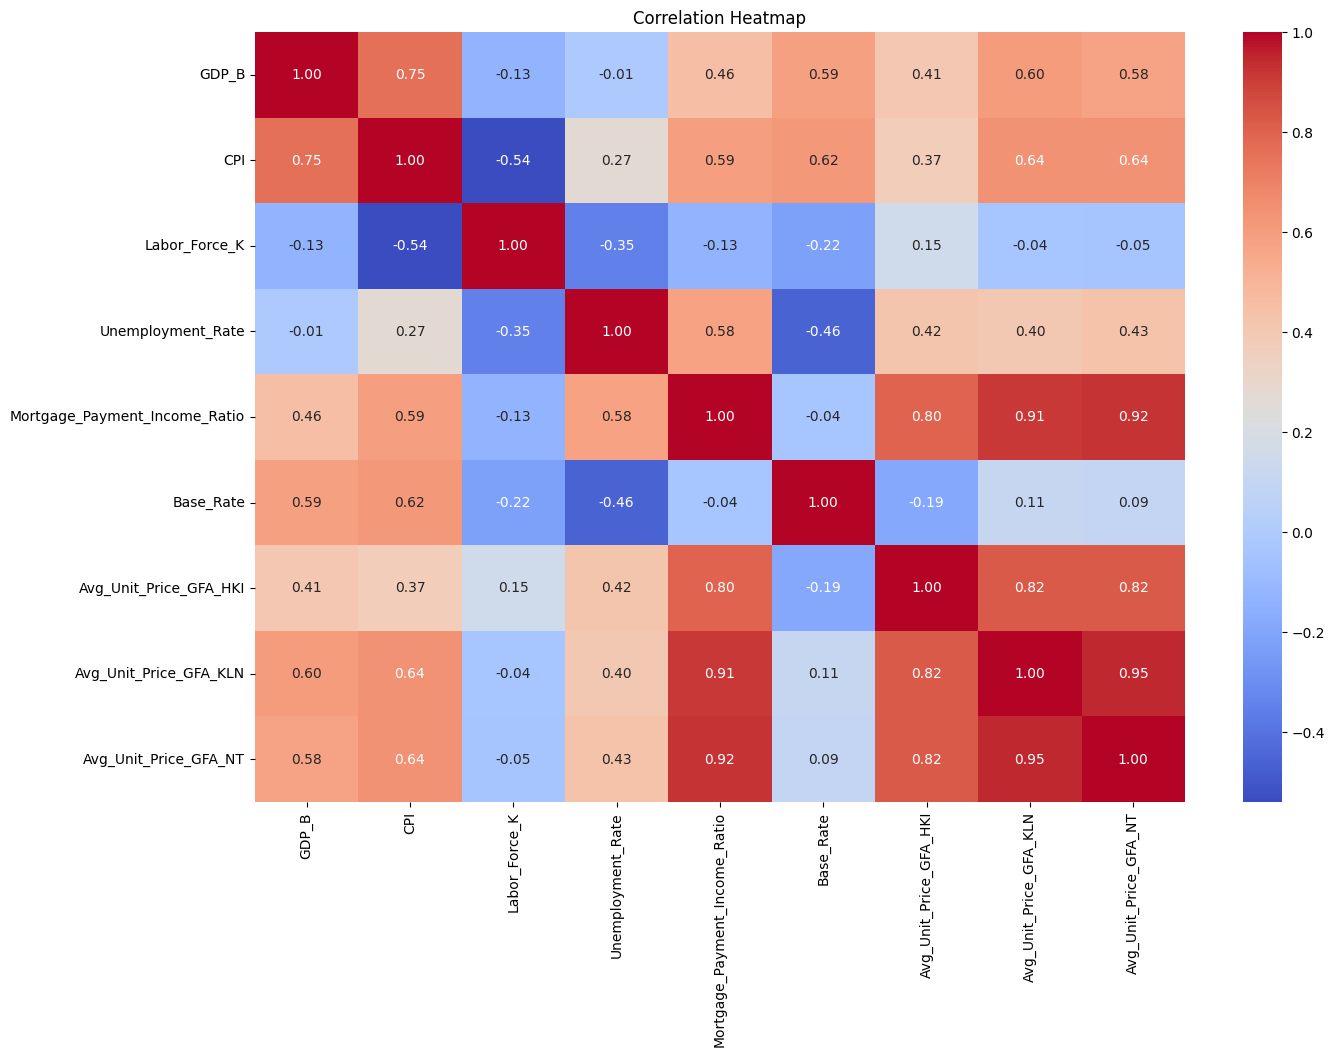

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df[cols1].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

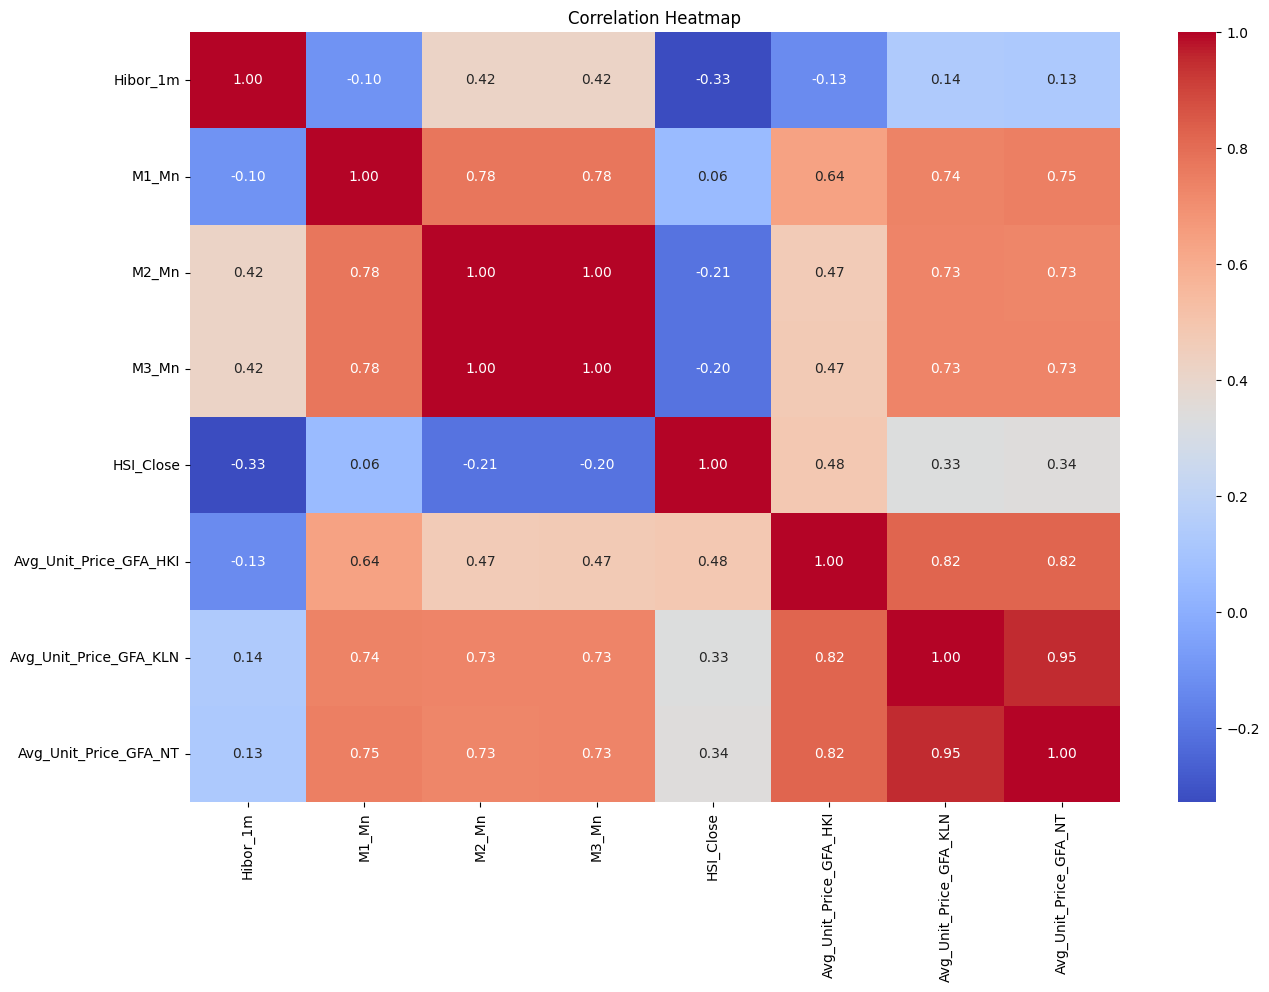

In [ ]:
correlation_matrix = df[cols2].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

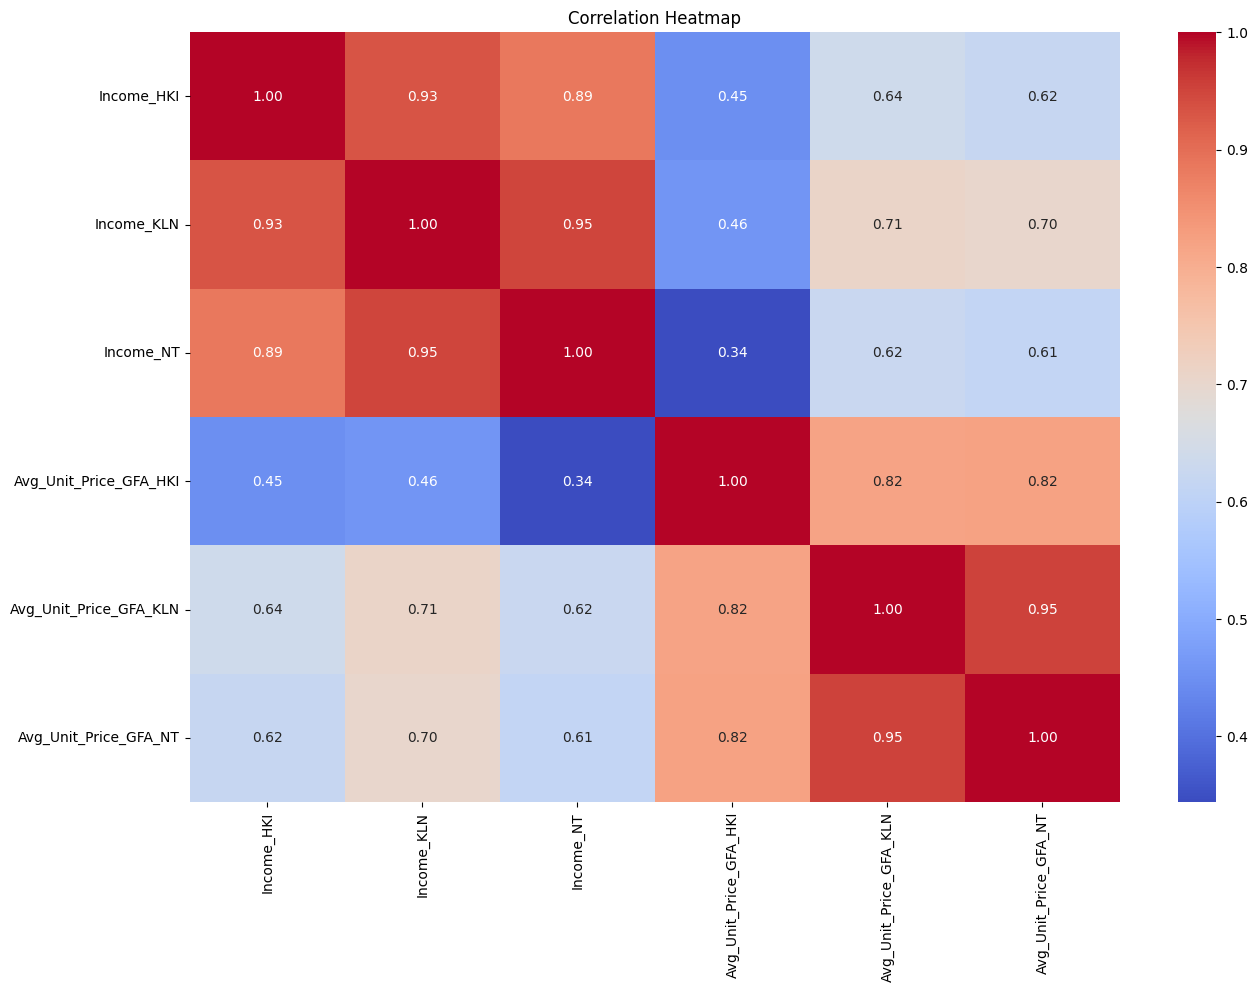

In [ ]:
correlation_matrix = df[cols3].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
correlation_matrix = df[["Avg_Unit_Price_GFA_NT", "CPI", "Mortgage_Payment_Income_Ratio", "Unemployment_Rate"]].corr()

In [ ]:
# Scatter Plot of Avg_Unit_Price_GFA vs CPI
cpi = df["CPI"].values
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=(15,4))

# HKI
avg_unit_price_gfa_HKI = df["Avg_Unit_Price_GFA_HKI"].values

ax1.scatter(cpi, avg_unit_price_gfa_HKI)
ax1.set_xlabel('CPI')
ax1.set_ylabel('Avg_Unit_Price_GFA')
ax1.set_title('Avg_Unit_Price_GFA_HKI vs CPI')

fit = np.polyfit(cpi, avg_unit_price_gfa_HKI, 1)
fit_fn = np.poly1d(fit)
ax1.plot(cpi, fit_fn(cpi), 'r')

# KLN
avg_unit_price_gfa_KLN = df["Avg_Unit_Price_GFA_KLN"].values

ax2.scatter(cpi, avg_unit_price_gfa_KLN)
ax2.set_xlabel('CPI')
ax2.set_title('Avg_Unit_Price_GFA_KLN vs CPI')

fit = np.polyfit(cpi, avg_unit_price_gfa_KLN, 1)
fit_fn = np.poly1d(fit)
ax2.plot(cpi, fit_fn(cpi), 'r')


# NT
avg_unit_price_gfa_nt = df["Avg_Unit_Price_GFA_NT"].values
ax3.scatter(cpi, avg_unit_price_gfa_nt)
ax3.set_xlabel('CPI')
ax3.set_title('Avg_Unit_Price_GFA_NT vs CPI')

fit = np.polyfit(cpi, avg_unit_price_gfa_nt, 1)
fit_fn = np.poly1d(fit)
ax3.plot(cpi, fit_fn(cpi), 'r')

fig.suptitle('Scatter Plot of Avg_Unit_Price_GFA vs CPI')
plt.show()

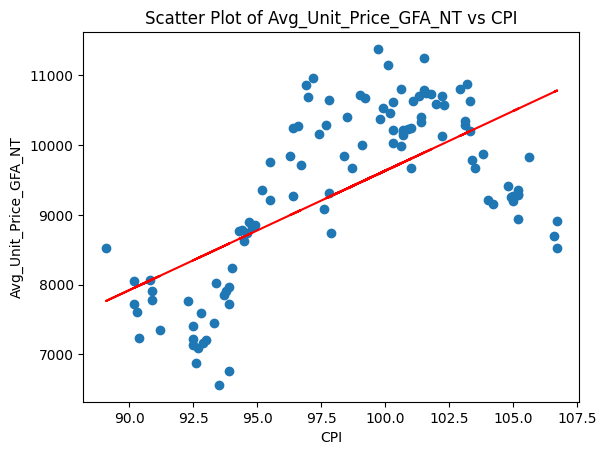

In [ ]:

# SET DATA BASIC
avg_unit_price_gfa_nt = df["Avg_Unit_Price_GFA_NT"].values
cpi = df["CPI"].values
plt.scatter(cpi, avg_unit_price_gfa_nt)
plt.xlabel('CPI')
plt.ylabel('Avg_Unit_Price_GFA_NT')
plt.title('Scatter Plot of Avg_Unit_Price_GFA_NT vs CPI')

fit = np.polyfit(cpi, avg_unit_price_gfa_nt, 1)
fit_fn = np.poly1d(fit)
plt.plot(cpi, fit_fn(cpi), 'r')

plt.show()

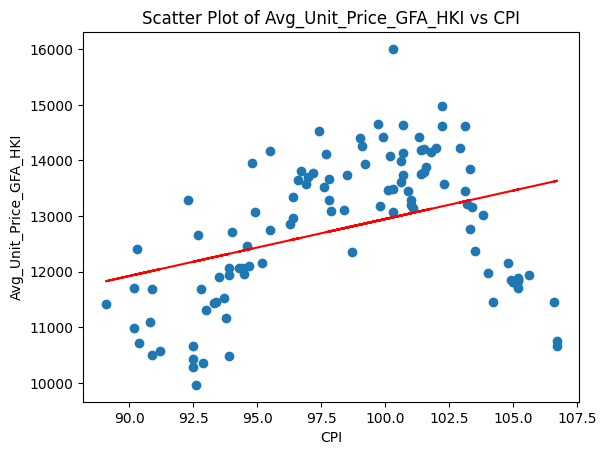

In [ ]:
# HKI
avg_unit_price_gfa_HKI = df["Avg_Unit_Price_GFA_HKI"].values
cpi = df["CPI"].values

plt.scatter(cpi, avg_unit_price_gfa_HKI)
plt.xlabel('CPI')
plt.ylabel('Avg_Unit_Price_GFA_HKI')
plt.title('Scatter Plot of Avg_Unit_Price_GFA_HKI vs CPI')

fit = np.polyfit(cpi, avg_unit_price_gfa_HKI, 1)
fit_fn = np.poly1d(fit)
plt.plot(cpi, fit_fn(cpi), 'r')

plt.show()

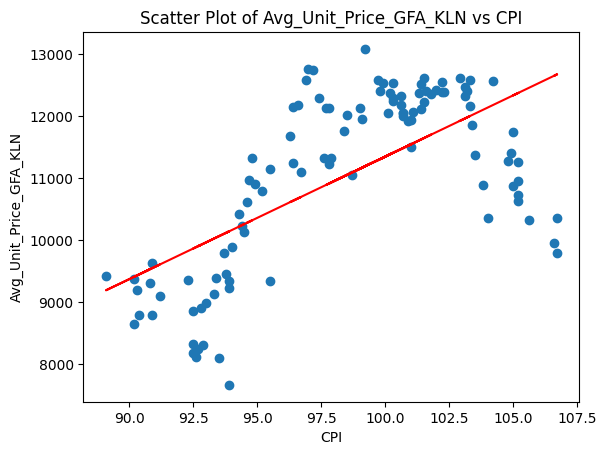

In [ ]:
# SET DATA BASIC
avg_unit_price_gfa_KLN = df["Avg_Unit_Price_GFA_KLN"].values
cpi = df["CPI"].values

plt.scatter(cpi, avg_unit_price_gfa_KLN)
plt.xlabel('CPI')
plt.ylabel('Avg_Unit_Price_GFA_KLN')
plt.title('Scatter Plot of Avg_Unit_Price_GFA_KLN vs CPI')

fit = np.polyfit(cpi, avg_unit_price_gfa_KLN, 1)
fit_fn = np.poly1d(fit)
plt.plot(cpi, fit_fn(cpi), 'r')

plt.show()

In [ ]:
# Scatter Plot of Avg_Unit_Price_GFA_NT vs Mortgage_Payment_Income_Ratio
MPIR = df['Mortgage_Payment_Income_Ratio'].values

fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=(15,4))

# HKI
ax1.scatter(MPIR ,avg_unit_price_gfa_HKI)
ax1.set_xlabel('MPIR')
ax1.set_ylabel('Avg_Unit_Price_GFA')
ax1.set_title('Avg_Unit_Price_GFA_HKI vs MPIR')

fit = np.polyfit(MPIR, avg_unit_price_gfa_HKI, 1)
fit_fn = np.poly1d(fit)
ax1.plot(MPIR, fit_fn(MPIR), 'r')

# KLN
ax2.scatter(MPIR ,avg_unit_price_gfa_KLN)
ax2.set_xlabel('MPIR')
ax2.set_title('Avg_Unit_Price_GFA_KLN vs MPIR')

fit = np.polyfit(MPIR, avg_unit_price_gfa_KLN, 1)
fit_fn = np.poly1d(fit)
ax2.plot(MPIR, fit_fn(MPIR), 'r')

# NT
ax3.scatter(MPIR ,avg_unit_price_gfa_nt)
ax3.set_xlabel('MPIR')
ax3.set_title('Avg_Unit_Price_GFA_NT vs MPIR')

fit = np.polyfit(MPIR, avg_unit_price_gfa_nt, 1)
fit_fn = np.poly1d(fit)
ax3.plot(MPIR, fit_fn(MPIR), 'r')
plt.show()

fig.suptitle('Scatter Plot of Avg_Unit_Price_GFA vs Mortgage_Payment_Income_Ratio')
plt.show()

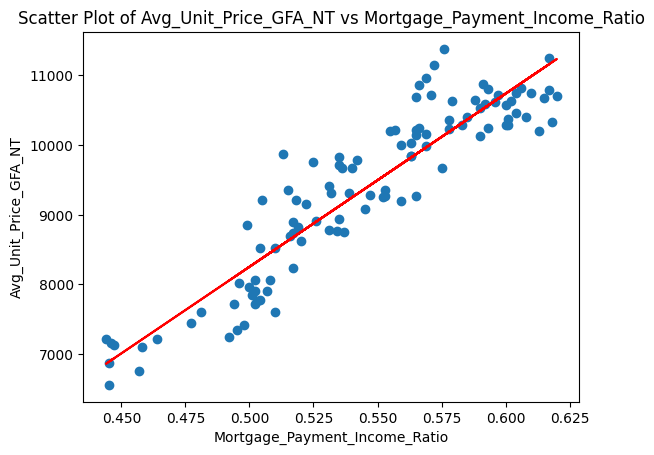

In [ ]:
## Use NT as one Example
MPIR = df['Mortgage_Payment_Income_Ratio'].values

plt.scatter(MPIR ,avg_unit_price_gfa_nt)
plt.xlabel('Mortgage_Payment_Income_Ratio')
plt.ylabel('Avg_Unit_Price_GFA_NT')
plt.title('Scatter Plot of Avg_Unit_Price_GFA_NT vs Mortgage_Payment_Income_Ratio')
fit = np.polyfit(MPIR, avg_unit_price_gfa_nt, 1)
fit_fn = np.poly1d(fit)
plt.plot(MPIR, fit_fn(MPIR), 'r')
plt.show()

Using selected features for doing Machine Learning to predict the Average Unit Price

In [ ]:
## Select features: 'Mortgage_Payment_Income_Ratio','GDP_B','Unemployment_Rate','M1_Mn','HSI_Close','Income_HKI'

In [ ]:
# Select features and target variable
selected_features = [
    'Mortgage_Payment_Income_Ratio',
    'GDP_B',
    'Unemployment_Rate',
    'M1_Mn',
    'HSI_Close',
    'Income_HKI'
]
X = df[selected_features]
y = df['Avg_Unit_Price_GFA_HKI']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')

RMSE: 720.82
R-squared: 0.74


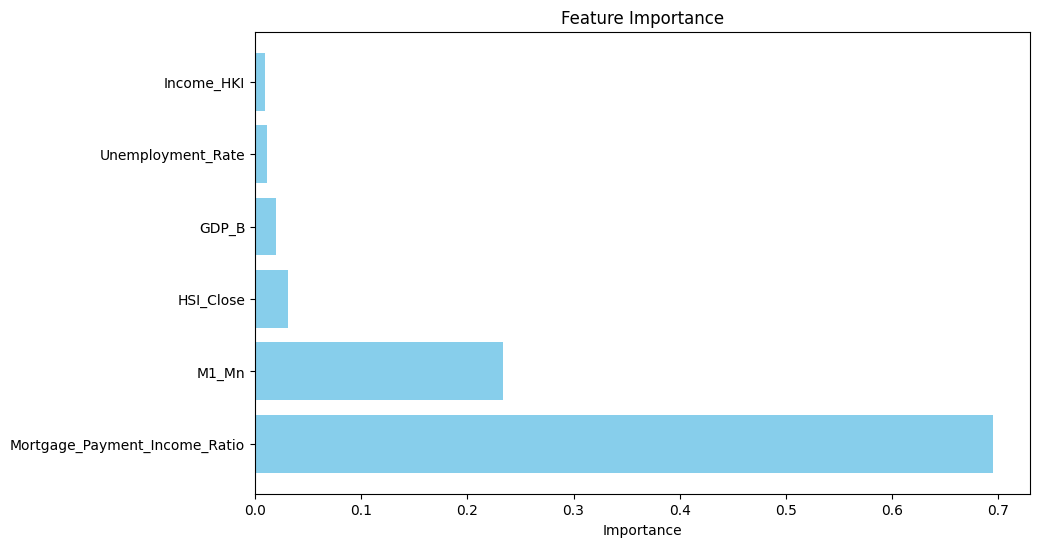

In [ ]:
# Feature importance
importances = rf_model.feature_importances_
feature_names = selected_features
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
# print(importance_df)
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
#plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Example prediction on new data  / ## Assume that HSI will hit 25,000 in 2024
new_data = {
    'Mortgage_Payment_Income_Ratio': [0.5],
    'GDP_B': [757273],
    'Unemployment_Rate': [3.0],
    'M1_Mn': [2600000],
    'HSI_Close': [25000],
    'Income_HKI': [40000]
}
new_df = pd.DataFrame(new_data)
predicted_price = rf_model.predict(new_df)
print(f'Predicted Avg Unit Price: {predicted_price[0]:.2f}')

Predicted Avg Unit Price: 11719.90


**Predict the Average Unit Price of Net Floor Area from Gross Floor area**

In [ ]:
# Load the dataset
df = pd.read_csv('GFAvsNFA.csv')
df = df.dropna(subset=['GFA_HK', 'NFA_HK', 'GFA_NT', 'NFA_NT', 'GFA_KLN', 'NFA_KLN'])
fig_hk = px.scatter(df, x='GFA_HK', y='NFA_HK',trendline='ols', title='GFA vs NFA in Hong Kong',
                    labels={'GFA_HK': 'Gross Floor Area (HK)', 'NFA_HK': 'Net Floor Area (HK)'})
fig_hk.show()

fig_kln = px.scatter(df, x='GFA_KLN', y='NFA_KLN',trendline='ols', title='GFA vs NFA in Kowloon',
                     labels={'GFA_KLN': 'Gross Floor Area (KLN)', 'NFA_KLN': 'Net Floor Area (KLN)'})
fig_kln.show()

fig_nt = px.scatter(df, x='GFA_NT', y='NFA_NT',trendline='ols', title='GFA vs NFA in New Territories',
                    labels={'GFA_NT': 'Gross Floor Area (NT)', 'NFA_NT': 'Net Floor Area (NT)'})
fig_nt.show()
# Calculate correlation coefficients
correlation_hk = df['GFA_HK'].corr(df['NFA_HK'])
correlation_kln = df['GFA_KLN'].corr(df['NFA_KLN'])
correlation_nt = df['GFA_NT'].corr(df['NFA_NT'])

print(f'Correlation between GFA and NFA in Hong Kong: {correlation_hk:.2f}')
print(f'Correlation between GFA and NFA in Kowloon: {correlation_kln:.2f}')
print(f'Correlation between GFA and NFA in New Territories: {correlation_nt:.2f}')

Correlation between GFA and NFA in Hong Kong: 0.93
Correlation between GFA and NFA in Kowloon: 0.97
Correlation between GFA and NFA in New Territories: 0.98


In [ ]:
## Example of using the Predicted GFA to estimate NFA
X = df[['GFA_KLN']]
y = df['NFA_KLN']

model = LinearRegression()
model.fit(X, y)

m = model.coef_[0]
b = model.intercept_
# Prediction
gfa_value = 10446.81
predicted_nfa = model.predict(np.array([[gfa_value]]))[0]
print(f'Predicted NFA for GFA of {gfa_value}: {predicted_nfa:.2f}')

Predicted NFA for GFA of 10446.81: 13681.08


**The End**